In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

## References
## https://github.com/MedMNIST/MedMNIST/blob/main/medmnist/dataset.py
## Good examples for augmentations: https://www.neurotec.uni-bremen.de/drupal/node/30
## https://gist.github.com/ngoodger/d3744080ffcaf7627c36692c00c4bf8a#file-wgan_conditional-ipynb


In [7]:
transform = transforms.Compose([
                        transforms.ToTensor(), 
                        transforms.Normalize((0.5,), (0.5,))
                        ])

dataset = torchvision.datasets.MNIST(root='../../datasets', 
                                    train=True, 
                                    download=True,
                                    transform=transform)

#http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
print(len(dataset)) #60000

#idx = (dataset.targets==0) | (dataset.targets==1)
idx = (dataset.targets==0) 
dataset.targets = dataset.targets[idx]
dataset.data = dataset.data[idx]
#https://discuss.pytorch.org/t/how-to-use-one-class-of-number-in-mnist/26276/19

len_dataset=len(dataset)
print(len_dataset) 



60000
5923


In [3]:

# BATCH_SIZE = 4
# BATCH_SIZE = 10
BATCH_SIZE = 100
SHUFFLE_T = True
SHUFFLE_F = False

# Data loader
dataloader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=SHUFFLE_T)



BATCHES_SIZE=len_dataset/BATCH_SIZE
print(f'BATCHES_SIZE {BATCHES_SIZE} or len(dataloader) {len(dataloader)}')
LEN_BATCHSIZE=len(dataloader)


BATCHES_SIZE 59.23 or len(dataloader) 60


batch_idx: 0 of 60 ; sampled images: 100
    img.shape: torch.Size([100, 1, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 302, 302])


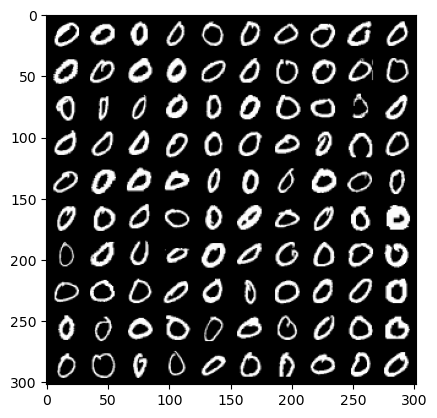

In [4]:
## Displaying dataloader content

sampled_images=0
for batch_idx, batch in enumerate(dataloader):  #iterate through each batch    
    sampled_images = sampled_images + BATCH_SIZE
    if batch_idx % 1000 == 0:
        print(f'batch_idx: {batch_idx} of { LEN_BATCHSIZE } ; sampled images: {sampled_images}')
        imgs=batch[0]
        labels=batch[1]

        print(f'    img.shape: {imgs.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        print(f'    img.dtype: {imgs.dtype}') #torch.Size([BATCH_SIZE, 1, 64, 64])

        grid_img = torchvision.utils.make_grid(imgs, nrow=10, normalize=True) 
        print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        plt.imshow(grid_img.permute(1, 2, 0))
        plt.show()
        

In [5]:
# ls -la